# Final Exam  (100 pts + 10 Bonus pts)

### Your Name: Andrew Poon
### YourUserID: 251009864

## General
The instructions for the final exam are included in the cover page shared on OWL. In addion, some basic rules:

* You **are allowed** to use any document and sources on your computer and look up documents on the internet. **You need to cite any code that you use if it is NOT from the course Labs or Tutorial examples**.
* You or **not allowed** to share documents, or communicate in any other way with people about the final during the final. Afterwards, you are not allowed to share the final, or talk about its content, with students who still have to take a make-up final  
* Most questions also require a written answer. The answer to these questions should be given in full English sentences.
* All Figures should have a x-axis and y-axis label.
* Add as many cells as you want, whenever you need to. 
* You need to submit the final by the due date (December 20, 2022 at 1:00 pm) on OWL in the Assignments / Final Exam where you downloaded the Data sets and Jupyter Notebook. Late submission will be scored with 0 pts, unless you have received special accommodations. To avoid technical difficulties, start your submission at latest five to ten minutes before the deadline. To be sure, you can also submit multiple versions - only the latest version will be graded.  

**Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting.**

### Additional Guidance

If at any point you are not sure about the answer, then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!



## Data sets
In this exam you will use 3 separate datasets. Data sets are entitled according to the exam Questions (Dataset1 to be used in Question1, Dataset2 to be used in Question2, and Dataset3 to be used in Question3).  

You need to download all 3 datasets from OWL in the Assignments / Final Exam 




### Preliminaries

Feel free to add any libraries to the Preliminaries. However, be mindful of every question's restrictions as some may exclude use of some functions.

In [296]:
## perform the necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import recall_score, make_scorer, mean_squared_error, confusion_matrix, roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import torch

# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings 
warnings.filterwarnings('ignore')

## Question 1 - Model Selection (40 pts + 5 Bonus pts)

### Data set

In this question you need to download and use Dataset1. 

Dataset1 lists the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model among three candidates that can best predict a player's monetary "Value". The dataset has the following attributes:
- Age: Player age in years
- Nationality: Players nationality
- Overall: Player overall performance score (higher better)
- Potential: Player potential score (higher better)
- Club: Player home soccer club
- Value: Player value *i.e*, the amount of money a club should pay in order to purchase the player (higher better)
- Wage: Player stipend (higher better)
- Preferred Foot: Player preferred foot to play
- International Reputation: Player international fame (higher better)
- Week Foot: Performance score of player weak foot (higher better)
- Skill Moves: Player move skill score (higher better)
- Body Type: Player body type
- Position: Position player holds on the pitch
- Height: Player height in CM
- Weight: Player weight in kg

### Question 1.1 - Data load  (4 pts)

- Load `Dataset1.csv` as a pandas dataframe, and display its first 5 rows. (1
pt)
- Does the data contain any missing value(s)? Do you see any suspicious value(s) in the statistical summary of the data? (1 pt)
- Dummy code catecorical variables (drop the first). (2 pt)

In [351]:
df=pd.read_csv('Dataset1.csv')
df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,Portugal,86,87,Manchester United,78500000.0,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,179,69
1,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky,Back,172,69
2,31,Belgium,91,91,Manchester City,107500000.0,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,181,70
3,25,Italy,86,89,Inter,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal,Middle,172,68
4,27,Germany,89,90,FC Bayern München,105500000.0,130000.0,Right,4.0,4.0,3.0,Normal,Middle,177,75


In [352]:
print(df.isnull().sum())
df.describe()

Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Body Type                   0
Position                    0
Height                      0
Weight                      0
dtype: int64


,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,4903.000000,4903.000000,4903.000000,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,25.751581,69.188864,73.407098,5.931980e+06,15037.344483,1.210891,2.992046,2.514787,181.053437,75.154803
std,4.483194,7.005289,6.593820,1.271123e+07,29897.342606,0.572371,0.689830,0.804754,6.979453,7.048869
min,16.000000,47.000000,51.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,156.000000,49.000000
25%,22.000000,64.000000,69.000000,7.750000e+05,1000.000000,1.000000,3.000000,2.000000,176.000000,70.000000
50%,25.000000,69.000000,73.000000,1.700000e+06,4000.000000,1.000000,3.000000,2.000000,181.000000,75.000000
75%,29.000000,74.000000,78.000000,4.500000e+06,16000.000000,1.000000,3.000000,3.000000,186.000000,80.000000
max,44.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,102.000000


In [353]:
df = pd.get_dummies(df, drop_first=True, columns=['Preferred Foot', 'Body Type','Position'])
df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Preferred Foot_Right,Body Type_Normal,Body Type_Stocky,Position_Forward,Position_Middle
count,4903.000000,4903.000000,4903.000000,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,25.751581,69.188864,73.407098,5.931980e+06,15037.344483,1.210891,2.992046,2.514787,181.053437,75.154803,0.747094,0.613910,0.078115,0.143586,0.368754
std,4.483194,7.005289,6.593820,1.271123e+07,29897.342606,0.572371,0.689830,0.804754,6.979453,7.048869,0.434722,0.486901,0.268381,0.350705,0.482516
min,16.000000,47.000000,51.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,156.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,64.000000,69.000000,7.750000e+05,1000.000000,1.000000,3.000000,2.000000,176.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,69.000000,73.000000,1.700000e+06,4000.000000,1.000000,3.000000,2.000000,181.000000,75.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,29.000000,74.000000,78.000000,4.500000e+06,16000.000000,1.000000,3.000000,3.000000,186.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,44.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Your written answer here **

**Answer: .** There is no null values within the dataset and there are no suspicous value within the dataset with df.describe()

### Question 1.2 - Feature extraction  (5 pts)

- Use `sns.jointplot` to plot the joint distribution between Weight and Height (2 pts)
- The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². With this knowledge, see if you can do some meaningful feature extraction and then drop Weight and Height. (3 pts)

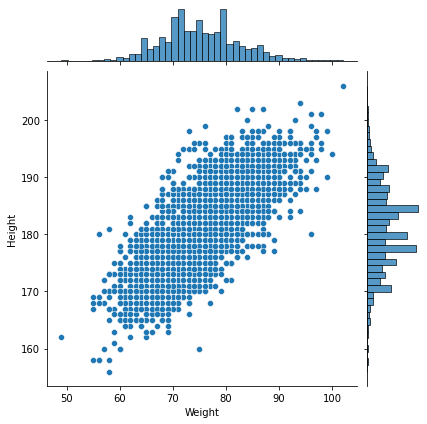

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Preferred Foot_Right,Body Type_Normal,Body Type_Stocky,Position_Forward,Position_Middle,BMI
count,4903.000000,4903.000000,4903.000000,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,25.751581,69.188864,73.407098,5.931980e+06,15037.344483,1.210891,2.992046,2.514787,181.053437,75.154803,0.747094,0.613910,0.078115,0.143586,0.368754,22.901513
std,4.483194,7.005289,6.593820,1.271123e+07,29897.342606,0.572371,0.689830,0.804754,6.979453,7.048869,0.434722,0.486901,0.268381,0.350705,0.482516,1.371213
min,16.000000,47.000000,51.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,156.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.283951
25%,22.000000,64.000000,69.000000,7.750000e+05,1000.000000,1.000000,3.000000,2.000000,176.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.977351
50%,25.000000,69.000000,73.000000,1.700000e+06,4000.000000,1.000000,3.000000,2.000000,181.000000,75.000000,1.000000,1.000000,0.000000,0.000000,0.000000,22.893074
75%,29.000000,74.000000,78.000000,4.500000e+06,16000.000000,1.000000,3.000000,3.000000,186.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,23.765432
max,44.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.629630


In [355]:
ax = sns.jointplot(x=df['Weight'],y=df['Height'])
ax.ax_joint.set_xlabel('Weight')
ax.ax_joint.set_ylabel('Height')
plt.show()

#Get BMI by weight/(height(in meters))**2

df['BMI']=(df.iloc[:,11].values)/((df.iloc[:,10].values/100)**2)
df.drop(['Weight','Height'],axis=1)
df.describe()



### Question 1.3 - Transformations  (9 pts)

Use `sns.jointplot` to investigate the following relationships and apply Logarithm transformation and replace the feature with its transformation **where needed** (Drop the variables that has been transformed and keep the logarithm transformation of that variable instead):

Note: plot joint distributions **before** and **after** trasformation (if it's needed) to make sure the transformation fixes the problem. 
- Value vs. Wage
- Value vs. Overall
- Value vs. Potential


Normal Jointplot


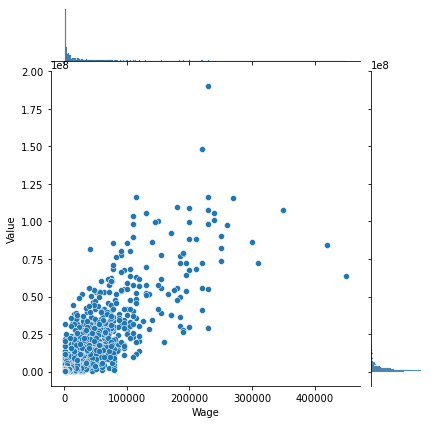

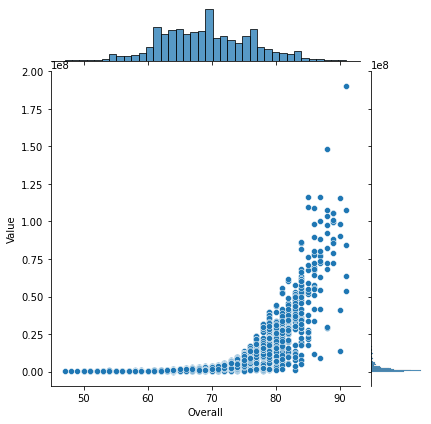

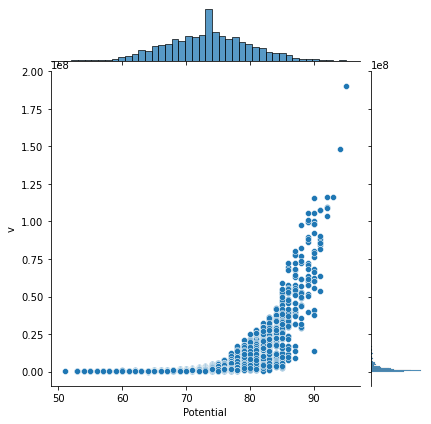

Log Jointplot


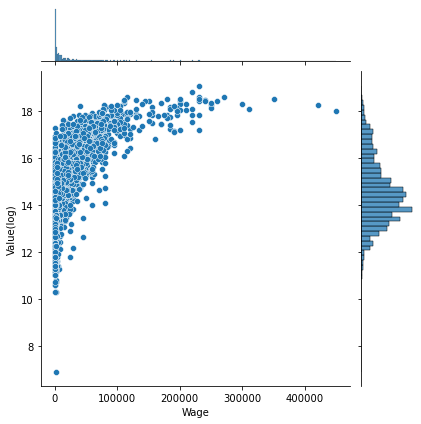

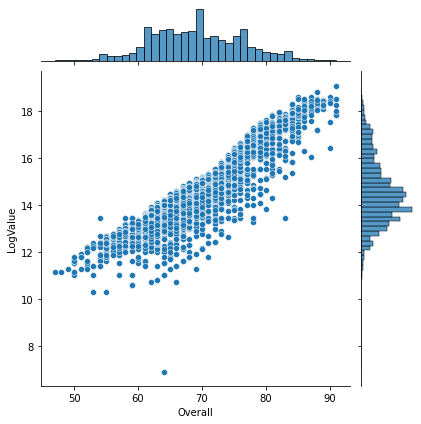

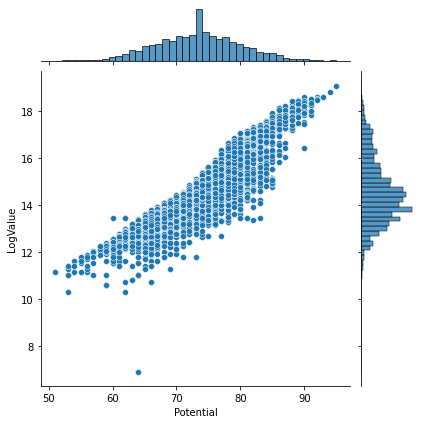

In [356]:
df['LogValue']=np.log(df['Value'] + 1)
#Value vs Wage
print("Normal Jointplot")
ax = sns.jointplot(x=df['Wage'], y=df['Value'])
ax.ax_joint.set_xlabel('Wage')
ax.ax_joint.set_ylabel('Value')
plt.show()
ax = sns.jointplot(x=df['Overall'], y=df['Value'])
ax.ax_joint.set_xlabel('Overall')
ax.ax_joint.set_ylabel('Value')
plt.show()
ax = sns.jointplot(x=df['Potential'], y=df['Value'])
ax.ax_joint.set_xlabel('Potential')
ax.ax_joint.set_ylabel('v')
plt.show()

print("Log Jointplot")
ax = sns.jointplot(x=df['Wage'], y=df['LogValue'])
ax.ax_joint.set_xlabel('Wage')
ax.ax_joint.set_ylabel('Value(log)')
plt.show()

ax = sns.jointplot(x=df['Overall'], y=df['LogValue'])
ax.ax_joint.set_xlabel('Overall')
ax.ax_joint.set_ylabel('LogValue')
plt.show()

ax = sns.jointplot(x=df['Potential'], y=df['LogValue'])
ax.ax_joint.set_xlabel('Potential')
ax.ax_joint.set_ylabel('LogValue')
plt.show()
df.drop('Value',axis=1,inplace=True)

#Value should be logged since it gives a way better distribution on the Y-axis meaning I have to drop it

### Question 1.4 - Data split  (2 pts)

- Split data to put aside 20% for testing purpose (with `random_state=1220`). (1 pt)
  
  *Note: keep the Value (or LogValue if you transformed it in Question 1.3) as the target variable, and use the remaining variables as features.* 
  

- Also define an RMSE scorer function. (1 pt)

In [361]:
featurs = np.r_[0:15]
targets = np.r_[17]
#had to drop club and nationality for cross_val_score to work
X=df.drop(['Club','Nationality'],axis=1)
y=df.iloc[:, 17]

x_train, x_test, y_train, y_test = train_test_split(X.iloc[:, featurs],
                                                    df.iloc[:, targets],
                                                    test_size=0.2, 
                                                    random_state=1220)

def rmse(y,ypred):
    return mean_squared_error(y,y_pred)

### Question 1.5 - Linear Regression  (6 pts)

-   Implement shuffled 5-split Kfold cross-validation on the sklearn's linear regression (with default arguments) and RMSE scorer function above and report the mean of cross validation score.
-   Fit the model to the training set 
-   Report prediction RMSE score

In [362]:
LogValue_reg=LinearRegression()
cv_score = cross_val_score(LogValue_reg, X, y, cv=5, scoring='neg_mean_squared_error',error_score="raise")
print(-cv_score.mean())

LogValue_reg.fit(x_train,y_train)
pred_logValue=LogValue_reg.predict(x_test)
#pred_logValue=np.array(pred_logValue.transpose())
#print(pred_logValue,y_test)

# For the RMSE value, I am getting an error on inconsistent numbers of samples: [981, 155]. 
#it has something to do with the the pred_logvalue not returing as a column which I couldn't figure out
#commented out to not get error

#rmse_value=rmse(y_test.iloc[:,0], pred_logValue)
#print(rmse_value)

3.138092744992039e-27


### Question 1.6 - Ridge Regression  (6 pts)

Bundle the StandardScaler with the sklearn's ridge regression (with default arguments except alpha = 1e-10) into a Pipeline, and:

- Implement shuffled 5-split Kfold cross-validation on the pipeline and report the mean of cross-validated RMSE score. 
- Fit the model to the training set 
- Report prediction RMSE score


In [363]:
ridge_reg = Pipeline([
    ('scale', StandardScaler()),
    ('reg', Ridge(alpha=1e-10, fit_intercept=True))
])
cv_score = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error')
print(-cv_score.mean())

ridge_reg.fit(x_train,y_train)
pred_logValue=ridge_reg.predict(x_test)

# For the RMSE value, I am getting an error on inconsistent numbers of samples: [981, 155]. 
#it has something to do with the the pred_logvalue not returing as a column which I couldn't figure out

#rmse_value=rmse(y_test, pred_logValue)
#print(rmse_value)

4.136844669158623e-26


### Question 1.7 - Random Forest  (6 pts)

-   Implement shuffled 5-split Kfold cross-validation on the sklearn's random forest regressor (using "RandomForestRegressor" from sklearn.ensemble library with default arguments except `n_jobs=-1`, and `random_state=1220`), and report the mean of cross-validated RMSE score.
-   Fit the model to the training set 
-   Report prediction RMSE score
-   Use `barplot` to generate the feature importance diagram from this model (limit the plot to the top 5)

0.004191114202428635


ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (16).

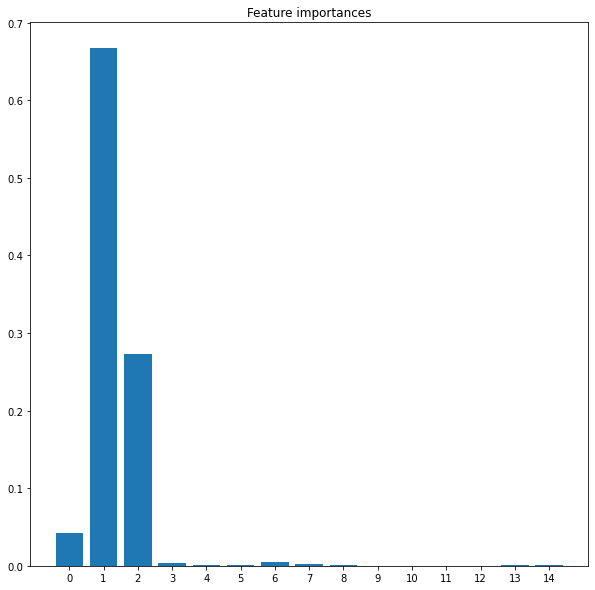

In [364]:
forest_reg = Pipeline([('regressor', RandomForestRegressor(n_jobs=-1,random_state=1220))])
cv_score = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print(-cv_score.mean())

forest_reg.fit(x_train,y_train)
pred_logValue=forest_reg.predict(x_test)

# For the RMSE value, I am getting an error on inconsistent numbers of samples: [981, 155]. 
#it has something to do with the the pred_logvalue not returing as a column which I couldn't figure out

#rmse_value=rmse(y_test, pred_logValue)
forest=RandomForestRegressor(n_jobs=-1,random_state=1220)
forest.fit(x_train,y_train)
importances = forest.feature_importances_

# Plot importances
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=90)
plt.show()

### Question 1.8 - Random Forest  and Gridsearch  (6 pt)

- Use the cross-validated grid search tool (5-fold) to find the best possible values for `n_estimators` for your forest. Here are the degrees of freedom for `n_estimators` try `[50, 100, 150]`. Use your RMSE scorer function and put `n_jobs=-1`, `refit = False`, then report the best values found.

- Take the random forest regressor again but this time use the best values found in the previous step, and again:
     -   Implement shuffled 5-split Kfold cross-validation on the sklearn's random forest regressor with the best `n_estimators` you found, `n_jobs=-1`, and `random_state=1220`), and report the mean of cross-validated RMSE score.
     -   Fit the model to the training set 
     -   Report prediction RMSE score
     -   Use `barplot` to generate the feature importance diagram from this model (limit the plot to the top 5)


ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (16).

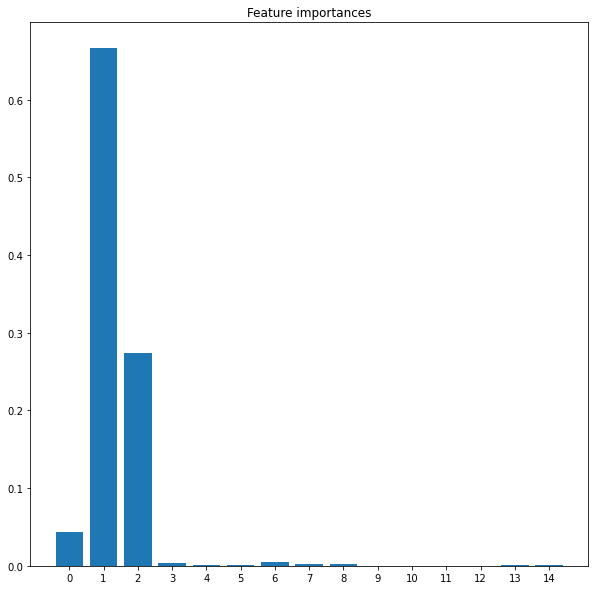

In [366]:
params = {'n_estimators': np.linspace(50,100,150)}
gscv = GridSearchCV(forest, param_grid=params, cv=5, scoring = 'neg_mean_squared_error', refit=True)
#Getting an error with gscv and the forest regressor. Not sure what to do
#Comment out the following for the bar plot to show
gscv.fit(x_train, y_train)
results = pd.DataFrame(gscv.cv_results_)
print(results.mean_test_score)

forest=RandomForestRegressor(n_jobs=-1,random_state=1220,n_estimators=50)
forest.fit(x_train,y_train)
importances = forest.feature_importances_

# Plot importances
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=90)
plt.show()

### Question 1.9 - Comparison  (1 pt)

From what you have seen in all your results, if you are asked to choose one final model to go into production, which one would you select? (Take computational complexity into account too)

**Your written answer here ** I am using the forest since it has the largest rmse mean score out of all of them and I couldn't get the predictRMSE to work.

## Question 2: Clustering (30 pts + 5 Bonus pts)

### Data set

In this question you need to download and use Dataset2. 

This dataset is a modified dataset from UCI Machine Learning Datasets. The data contains selling feature on a social media platform. Each record has information about the time the information is posted and engagements in the data (such as emotion). 


### Question 2.1 Data load and normalization (10 pts)

- Load the Data set (1 pt)

- How many observations and attributes do you have in Data set? (1 pt)

- Check for missing values and drop the columns that contain missing values. (1 pt)

- Create a label encoder using "LabelEncoder" from scikit learn and convert categorical label (`data_type`) into integers. (2 pts)

- Explain why it is a good idea to normalize the data for a K-Means clustering process. Then train a ```MinMaxScaler``` method over your full dataset. (5 pts) (**Note**: save a sample of `data_type` column before normalization for further use as the label later in Question 2.3) 

In [368]:
df2=pd.read_csv('Dataset2.csv')

print(df2.shape[0], "observations in training set")
print("Class breakdown:")
print(df2.value_counts())
print(df2.isnull().sum()) 
df2.drop('data_published',axis=1,inplace=True)
#df2.head()

le=LabelEncoder()
datatype=df2.iloc[:,1]
le.fit(df2.iloc[:,1])
df2['data_type']=le.transform(df2.iloc[:,1])
#df2.head()
X = df2.loc[:,['data_type']].values
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)

7050 observations in training set
Class breakdown:
ID    data_type  data_published   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys
1     video      4/22/2018 6:00   529            512           262         432        92         3         1          1         0             1
4697  photo      9/20/2017 5:54   383            28            10          377        6          0         0          0         0             1
4708  photo      9/8/2017 2:46    439            59            1           436        1          2         0          0         0             1
4707  photo      9/8/2017 6:14    329            46            7           329        0          0         0          0         0             1
4706  status     9/10/2017 3:07   265            82            0           256        1          0         0          8         0             1
                                                                                          

**Your written answer here **

**Answer: .** The reason behind the normalization of data is because all of the weight on the attribute are weighted the same meaning attributes with larger value are weighted signifcant more than lesser one. It also eliminate redundant data and ensure good quality cluster which can improve efficeny of clustering algorithm.

### Question 2.2 K-Means Clustering - Silhouette (10 pts)

- Use K-means to cluster data. Run a silhouette analysis over the data to answer these question. Create a silhouette plot for 2, 3, and 4 clusters and calculate the corresponding silhouette scores. Use a random seed of 20211231 for your cluster functions. (9 pts)

- **Written answer: How many clusters would you say the silhouette analysis show are in the data? Why?** (1 pt)

For n_clusters = 2 The average silhouette_score is : 0.9258193651702349
For n_clusters = 3 The average silhouette_score is : 0.9867867938371242
For n_clusters = 4 The average silhouette_score is : 1.0


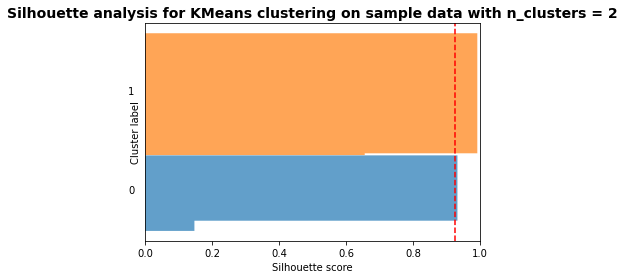

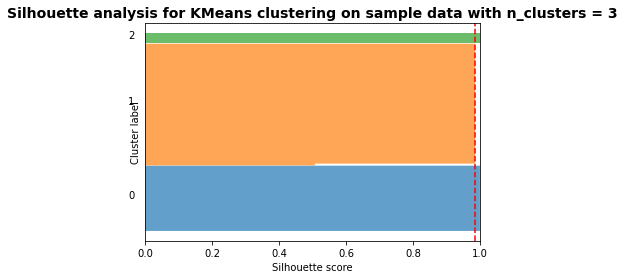

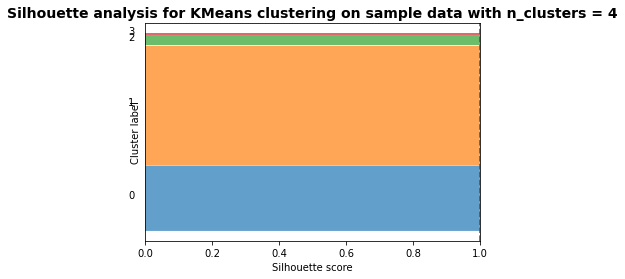

In [369]:
# MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

possible_ks = [2,3,4]
seed = 20211231


for cluster in possible_ks:
    model = KMeans(n_clusters=cluster, random_state=seed)
    model.fit(X_scaled)
    y_pred = model.predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, y_pred)
    print("For n_clusters =", cluster, "The average silhouette_score is :", silhouette_avg)
    
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim([0, 1])
    sample_silhouette_values = silhouette_samples(X_scaled, y_pred)
    
    
    y_lower = 10
    for i in range(cluster):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[y_pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                           alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    plt.title(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % cluster),
                    fontsize=14, fontweight='bold')   
    ax.set_xlabel("Silhouette score")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])
    ax.set_xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1])  

**Your written answer here **

**Answer**

I would say n_cluster should be 4 since it is able to reach 100% across most cluster which provide an almost impossible silhouette score.

### Question 2.3 K-Means Clustering - Elbow (15 pts)

- Use elbow method to find optimal number of clusters for up to 10 clusters. (3 pts)

- Compare the models accuracy for the best three number of clusters and explain your final decision (Hint: use "kmeans.fit"). (12 pts)

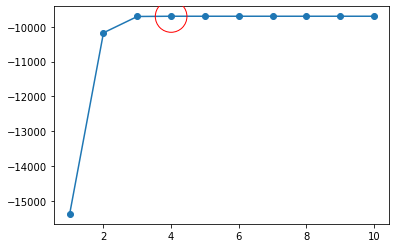

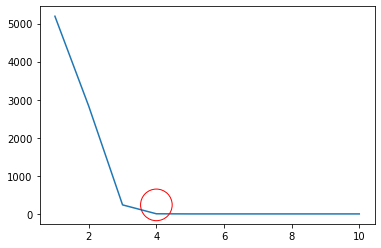

In [370]:
min_clusters = 1
max_clusters = 10

num_clusters = range(min_clusters, max_clusters+1)
scores = []

for clusters in num_clusters:

    model = KMeans(n_clusters=clusters, random_state=seed)
    model.fit(X_scaled)
    y_pred = model.predict(X_scaled)
    scores.append(model.score(X))

fig, ax = plt.subplots()
ax.plot(num_clusters, scores, marker = 'o')
ax.scatter(4, scores[2], facecolor = 'None', edgecolor = 'red', zorder = 3, s = 1000)

#Can also look at the derivative of the scores to find the elbow

fig, ax = plt.subplots()
plt.plot(num_clusters, np.gradient(scores))
ax.scatter(4, np.gradient(scores)[2], facecolor = 'None', edgecolor = 'red', zorder = 3, s = 1000)

**Your written answer here **

**Answer** Based on the elbow plot, it would also seems that having 4 cluster provide the most accuracy out of 2,3,4. after 4 cluster,the performance of the elbow plot plateau meaning 4 is definitely the choice here.

## Question 3: Neural Network (30 pts)

### Data set

In this question you need to download and use Dataset3. 

This dataset is a modified dataset from Kaggle datasets called "Lower Back Pain Symptoms Dataset". Lower back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs or tendons in the lumbar spine.
This data set is about to identify/label a person as abnormal or normal using collected physical spine details/data.



### Question 3.1 (12 pts)
Build a simple linear model (using PyTorch packages) with 12 input units for the 12 features in the data set and two output units for the two output classes (0: Normal, 1: Abnormal). Use a LogSigmoid as your output non-linearity. (2 pts)

* Load the dataset (1 pt)
* Encode output classes ("Label") as explained above, (0: Normal, 1: Abnormal), and separate inputs and outputs. (2 pts)
* Split the dataset, use 50% for training and 50% as the test set (use a random_state = 1).(1 pt)
* Z-standarize your input variables. (1 pt)
* Use the Cross-entropy loss as a training criterion. (1 pt)
* Use Stochastic gradient descent optimizer with a learning rate of 0.01. (1 pt)
* Run the optimization for 8000 iterations and record the loss for each iteration (1 pt)
* Plot the loss versus iterations   (2 pts)

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: Label, Length: 310, dtype: int32
53     0
137    0
24     0
256    1
134    0
      ..
203    0
255    1
72     0
235    1
37     0
Name: Label, Length: 155, dtype: int32


Text(0.5, 1.0, 'Loss vs. Epoch')

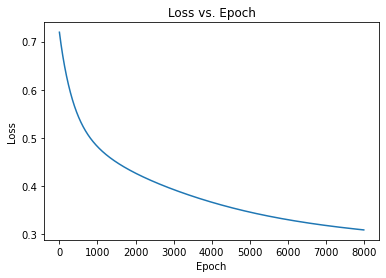

In [371]:
df3=pd.read_csv('Dataset3.csv')
le=LabelEncoder()
datatype=df3.iloc[:,12]
le.fit(df3.iloc[:,12])
df3['Label']=le.transform(df3.iloc[:,12])
y=df3['Label']
X=df3.drop('Label',axis=1)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.5, random_state=1)

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.dense1 = torch.nn.Linear(12, 2)
        self.activation = torch.nn.LogSigmoid()

    def forward(self, x):
        x = self.dense1(x)
        x = self.activation(x)
        return x
    
model = LinearModel()
# Z-standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cross entropy loss function
criterion = torch.nn.CrossEntropyLoss()

# SGD, lr=0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 8000
print (y_train)
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train.values)
X_test_testor = torch.FloatTensor(X_test_scaled)

lossrecord = []

for epoch in range(num_epochs):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(X_train_tensor)

    # Compute and print loss.
    loss = criterion(y_pred, y_train_tensor)
    lossrecord.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot
plt.plot(lossrecord)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')

### Question 3.2 (6 pts)
Now use your trained model to make predictions on the test set. 

Then plot ROC curve and report the area under the ROC curve for the test data set. 

HINT: To obtain a probability from the output of the network, take the logistic function of the difference between the activities of the two output units. Remember the output unit 0 is high when the model "thinks" its class is 0 and the output unit 1 is higher when the model "thinks" the class is 1.   

AUC: 0.783


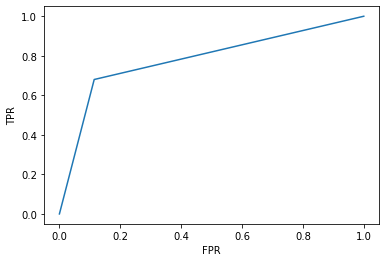

In [372]:
y_pred = model(torch.FloatTensor(X_test_scaled)).detach().numpy()
y_pred = np.argmax(y_pred, axis=1)
# Get ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred,pos_label=1)

ax=sns.lineplot(fpr,tpr)
ax.set(xlabel="FPR",ylabel="TPR")

# Get AUC
auc = roc_auc_score(y_test, y_pred)

print("AUC: %.3f" % auc)

### Question 3.3 (6 pts)
Change the neural network and add two hidden layers with 100 and 60 units, respectively. Use the LogSigmoid non-linearity for the hidden layers. Leave all the other parameters the same as for Question 3.1. Again train for 8000 iterations and plot the loss as a function of the iteration. 

Text(0.5, 1.0, 'Loss vs. Epoch')

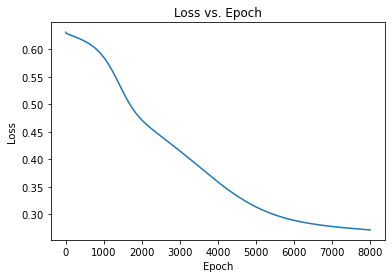

In [373]:
class NonLinearModel(torch.nn.Module):
    def __init__(self):
        super(NonLinearModel, self).__init__()
        self.dense1 = torch.nn.Linear(12, 100)
        self.activation1 = torch.nn.Sigmoid()
        self.dense2 = torch.nn.Linear(100, 60)
        self.activation2 = torch.nn.LogSigmoid()
        self.dense3 = torch.nn.Linear(60, 2)
        self.activation3 = torch.nn.LogSigmoid()
    def forward(self, x):
        x = self.dense1(x)
        x = self.activation1(x)
        x = self.dense2(x)
        x = self.activation2(x)
        x = self.dense3(x)
        x = self.activation3(x)
        return x
    
model = NonLinearModel()

# Z-standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cross entropy loss function
criterion = torch.nn.CrossEntropyLoss()

# SGD, lr=0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 8000

X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train.values)
X_test_testor = torch.FloatTensor(X_test_scaled)

lossrecord = []

#Run the iterations
for epoch in range(num_epochs):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(X_train_tensor)

    # Compute and print loss.
    loss = criterion(y_pred, y_train_tensor)
    lossrecord.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# Plot
plt.plot(lossrecord)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')

### Question 3.4 (6 pts)
Now use your trained model in Question 3.3 to make predictions on the test set.

Then plot ROC curve and report the area under the ROC curve for this network on the test set. 

__Written answer:__ Compare to Question 3.2, what do you conclude? 

AUC: 0.828


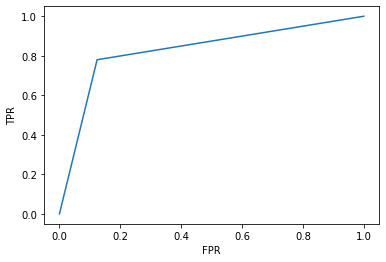

In [374]:
y_pred = model(torch.FloatTensor(X_test_scaled)).detach().numpy()
y_pred = np.argmax(y_pred, axis=1)
# Get ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
ax=sns.lineplot(fpr,tpr)
ax.set(xlabel="FPR",ylabel="TPR")
# Get AUC
auc = roc_auc_score(y_test, y_pred)

print("AUC: %.3f" % auc)